In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

Using TensorFlow backend.


In [2]:
df=pd.read_csv("/home/sid/Documents/credit1.csv");

In [3]:
X=df.drop(['Class'],1)
y=df['Class']

In [4]:
trainX,testX,trainY,testY=train_test_split(X,y,test_size=0.2)

In [5]:
trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

In [6]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
Xoversampled, Yoversampled = rus.fit_resample(trainX, trainY)

In [7]:
from xgboost import XGBClassifier
my_model = XGBClassifier(
    colsample_bytree=0.7, subsample=0.7, max_depth=23, n_estimators=150, n_jobs=28, eval_metric=[ "error","auc"])
my_model.fit(trainX, trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              eval_metric=['error', 'auc'], gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=23, min_child_weight=1, missing=None,
              n_estimators=150, n_jobs=28, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)

In [8]:
result_xgb1 = my_model.predict(testX)

In [9]:
accuracy_score(testY,result_xgb1)

0.9995962220427653

In [10]:
roc_auc_score(result_xgb1,testY)

0.9723692196393573

In [11]:
f1_score(testY,result_xgb1,average='weighted')

0.9995827858548106

In [12]:
confusion_matrix(result_xgb1,testY)

array([[56853,    18],
       [    5,    86]])

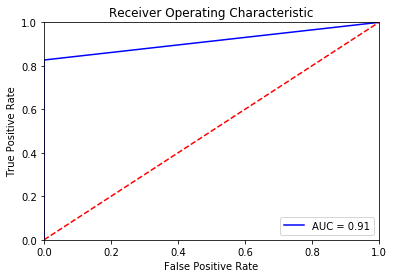

In [13]:
import sklearn.metrics as metrics
preds = result_xgb1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
my_model2 = XGBClassifier(
    colsample_bytree=0.7, subsample=0.7, max_depth=23, n_estimators=150, n_jobs=28, eval_metric=[ "error","auc"])
my_model2.fit(Xoversampled, Yoversampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              eval_metric=['error', 'auc'], gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=23, min_child_weight=1, missing=None,
              n_estimators=150, n_jobs=28, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)

In [15]:
result_xgb2 = my_model2.predict(testX)

In [16]:
accuracy_score(testY,result_xgb2)

0.9683122081387592

In [17]:
roc_auc_score(result_xgb2,testY)

0.5242942446285352

In [18]:
f1_score(testY,result_xgb2,average='weighted')

0.9822471335218879

In [19]:
confusion_matrix(testY,result_xgb2)

array([[55065,  1793],
       [   12,    92]])

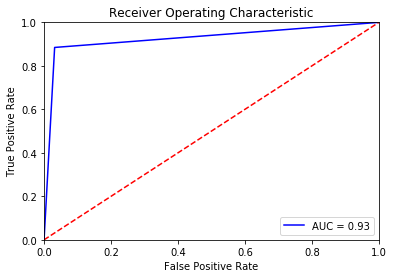

In [20]:
import sklearn.metrics as metrics
preds = result_xgb2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [23]:
clf.fit(trainX,trainY)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [24]:
result_ada1=clf.predict(testX)

In [25]:
accuracy_score(result_ada1,testY)

0.999420666409185

In [26]:
roc_auc_score(result_ada1,testY)

0.9585949660205872

In [27]:
f1_score(testY,result_ada1,average='weighted')

0.9993915948570751

In [28]:
confusion_matrix(testY,result_ada1)

array([[56851,     7],
       [   26,    78]])

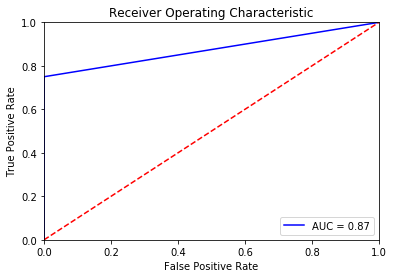

In [29]:
import sklearn.metrics as metrics
preds = result_ada1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
clf2 = AdaBoostClassifier(n_estimators=100, random_state=0)

In [31]:
clf2.fit(Xoversampled,Yoversampled)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [32]:
result_ada2=clf2.predict(testX)

In [33]:
accuracy_score(result_ada2,testY)

0.9479301990800885

In [34]:
roc_auc_score(result_ada2,testY)

0.51531709233505

In [35]:
f1_score(testY,result_ada2,average='weighted')

0.9715557347934296

In [36]:
confusion_matrix(testY,result_ada2)

array([[53902,  2956],
       [   10,    94]])

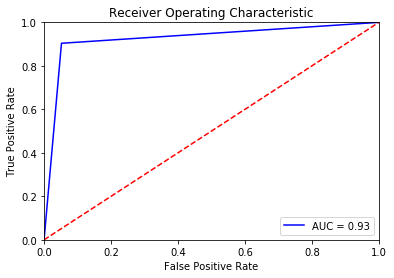

In [37]:
import sklearn.metrics as metrics
preds = result_ada2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [39]:
vclf1 = LogisticRegression(random_state=1)
vclf2 = RandomForestClassifier(n_estimators=50, random_state=1)
vclf3 = GaussianNB()

In [40]:
c=[vclf1,vclf2,vclf3]

In [41]:
for i in c:
    i.fit(trainX,trainY)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
x=len(c)
y=len(testY)
z=np.zeros((x,y))

In [43]:
for i in range(len(c)):
    z[i]=c[i].predict(testX)

In [44]:
result_vot1=np.zeros(y)
for i in range(y):
    count1=0
    for j in range(x):
        if(z[j][i]==1):
            count1=count1+1
    if(count1>1):
        result_vot1[i]=1
    else:
        result_vot1[i]=0

In [45]:
accuracy_score(result_vot1,testY)

0.9992275552122467

In [46]:
roc_auc_score(result_vot1,testY)

0.9282901247281149

In [47]:
f1_score(testY,result_vot1,average='weighted')

0.9991865356391293

In [48]:
confusion_matrix(result_vot1,testY)

array([[56846,    32],
       [   12,    72]])

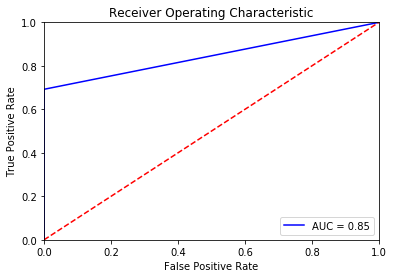

In [49]:
import sklearn.metrics as metrics
preds = result_vot1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
for i in c:
    i.fit(Xoversampled,Yoversampled)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
x=len(c)
y=len(testY)
z=np.zeros((x,y))

In [52]:
for i in range(len(c)):
    z[i]=c[i].predict(testX)

In [53]:
result_vot2=np.zeros(y)
for i in range(y):
    count1=0
    for j in range(x):
        if(z[j][i]==1):
            count1=count1+1
    if(count1>1):
        result_vot2[i]=1
    else:
        result_vot2[i]=0

In [54]:
accuracy_score(result_vot2,testY)

0.9890804395913065

In [55]:
roc_auc_score(result_vot2,testY)

0.5643455005608028

In [56]:
f1_score(testY,result_vot2,average='weighted')

0.9930955478185993

In [57]:
confusion_matrix(result_vot2,testY)

array([[56250,    14],
       [  608,    90]])

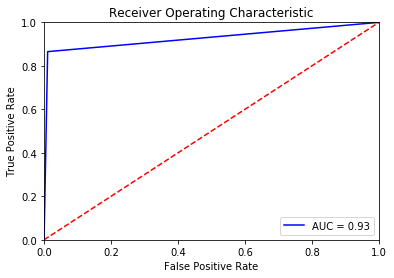

In [58]:
import sklearn.metrics as metrics
preds = result_vot2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()